# Three-Wave Mixing

**Name:**

**Total Points:** --/100 pts

**Extra Credit:** --/40 pts

In [ ]:
### UNCOMMENT AND RUN THIS CELL IF USING GOOGLE COLAB
# !pip install ipympl -q
# from google.colab import output
# output.enable_custom_widget_manager()

In the last notebook, we derived the wave equation for nonlinear interactions and worked through the specific example of second harmonic generation. Here's the wave equation again:

$$
\begin{align}
\frac{\partial E_n(z)}{\partial z}  &= j\frac{\omega_n}{2 \epsilon_0 c n_n} P_n^{(NL)}(z)
\end{align}
$$

In this notebook, we'll use the same wave equation to investigate general three-wave mixing processes.

## General Three-wave Mixing Process

The first task is to find the nonlinear polarization.   We have 3 fields at frequencies $\omega_1$, $\omega_2$, and $\omega_3$, labeled in order of increasing frequency.  

$$
\begin{align}
E(z,t) = E_1(z)e^{j(k_1z - \omega_1 t)} + E_2(z)e^{j(k_2z - \omega_2 t)} + E_3(z)e^{j(k_3z - \omega_3 t)}
\end{align}
$$

The second order nonlinear polarization is produced by $\chi^{(2)}$ and has the form:

$$
\begin{align}
P^{(NL)}(z, t) = \epsilon_0 \chi^{(2)}E^2(z,t).  
\end{align}
$$

Let's take the square of the electric field using SymPy:

In [14]:
from sympy import * #import sympy
E1, E2, E3, omega1, omega2, omega3, k1, k2, k3, z, t = symbols('E1, E2, E3, omega_1, omega_2, omega_3, k_1, k_2, k_3, z, t')
Esq = (E1*exp(I*(k1*z - omega1*t))+ functions.conjugate(E1)*exp(-I*(k1*z - omega1*t))
      + E2*exp(I*(k2*z - omega2*t))+ functions.conjugate(E2)*exp(-I*(k2*z - omega2*t))
      + E3*exp(I*(k3*z - (omega1+omega2)*t))+ functions.conjugate(E3)*exp(-I*(k3*z - (omega1+omega2)*t)))**2
simplify(Esq.expand())

E1**2*exp(2*I*k_1*z - 2*I*omega_1*t) + 2*E1*E2*exp(I*k_1*z + I*k_2*z - I*omega_1*t - I*omega_2*t) + 2*E1*E3*exp(I*k_1*z + I*k_3*z - 2*I*omega_1*t - I*omega_2*t) + 2*E1*exp(I*k_1*z - I*k_3*z + I*omega_2*t)*conjugate(E3) + 2*E1*exp(I*k_1*z - I*k_2*z - I*omega_1*t + I*omega_2*t)*conjugate(E2) + 2*E1*conjugate(E1) + E2**2*exp(2*I*k_2*z - 2*I*omega_2*t) + 2*E2*E3*exp(I*k_2*z + I*k_3*z - I*omega_1*t - 2*I*omega_2*t) + 2*E2*exp(I*k_2*z - I*k_3*z + I*omega_1*t)*conjugate(E3) + 2*E2*exp(-I*k_1*z + I*k_2*z + I*omega_1*t - I*omega_2*t)*conjugate(E1) + 2*E2*conjugate(E2) + E3**2*exp(2*I*k_3*z - 2*I*omega_1*t - 2*I*omega_2*t) + 2*E3*exp(-I*k_1*z + I*k_3*z - I*omega_2*t)*conjugate(E1) + 2*E3*exp(-I*k_2*z + I*k_3*z - I*omega_1*t)*conjugate(E2) + 2*E3*conjugate(E3) + exp(-2*I*k_1*z + 2*I*omega_1*t)*conjugate(E1)**2 + exp(-2*I*k_2*z + 2*I*omega_2*t)*conjugate(E2)**2 + exp(-2*I*k_3*z + 2*I*omega_1*t + 2*I*omega_2*t)*conjugate(E3)**2 + 2*exp(-I*k_1*z - I*k_2*z + I*omega_1*t + I*omega_2*t)*conjugate(E1)*c

There are lots of terms here, most of which we have identified in previous notebooks.  We look for terms in three categories:

1. $\tilde{P}^{(NL)}_3$ terms that oscillate at $\omega_3 = \omega_1 + \omega_2$.
2. $\tilde{P}^{(NL)}_2$ terms that oscillate at $\omega_2 = \omega_3 - \omega_1$.
3. $\tilde{P}^{(NL)}_1$ terms that oscillate at $\omega_1 = \omega_3 - \omega_2$.

We ignore the rest of terms, assuming that we have experimentally only phase-matched these three-wave mixing terms. By inspecting each term, we identify

你为什么总喜欢倒着写
$$
\begin{align}
\tilde{P}^{(NL)}_3 = 2\epsilon_0\chi^{(2)}E_1E_2e^{j(k_1+k_2-k_3)} \\
\tilde{P}^{(NL)}_2 = 2\epsilon_0\chi^{(2)}E_3E^*_1e^{j(k_3-k_1-k_2)} \\
\tilde{P}^{(NL)}_1 = 2\epsilon_0\chi^{(2)}E_3E^*_2e^{j(k_3-k_2-k_1)} 
\end{align}
$$

Notice there is a pattern that corresponds to the energy level diagram for each term.  
数学上是都能存在的,但是能级上要合理.  
After a little experience, you can actually just write down these terms by considering the possible energy level diagrams that lead to three-wave mixing.  We can now plug these nonlinear polarizations directly into the wave equation and produce 3 coupled differential equations:

$$
\begin{align}
\frac{\partial E_3(z)}{\partial z}  &= j\frac{\omega_3}{c n_3} \chi^{(2)}E_1E_2e^{-j\Delta k} \\
\frac{\partial E_2(z)}{\partial z}  &= j\frac{\omega_2}{c n_2} \chi^{(2)}E_3E^*_1e^{j\Delta k} \\
\frac{\partial E_1(z)}{\partial z}  &= j\frac{\omega_1}{c n_1} \chi^{(2)}E_3E^*_2e^{j\Delta k}
\end{align}
$$

where $\Delta k = k_3 - k_2 - k_1$.

## Exercises

1. (20 pts) Describe the pattern in each of the coupled wave equations and how it relates to the energy level diagram for each process.

1. $\omega_3 = \omega_1 + \omega_2$.  和频
2. $\omega_2 = \omega_3 - \omega_1$.  差频1
3. $\omega_1 = \omega_3 - \omega_2$.  差频2

## General 3-wave mixing

In the following code, we numerically solve these three differential equations.  
数值求解耦合波方程  
These can be used to predict sum-frequency generation, difference frequency generation, and any other three-wave mixing process. For concreteness, I have used a $\chi^{(2)}$ of lithium niobate and lightwaves near the visible spectrum. 

interactive(children=(FloatSlider(value=0.05, description='Lcoh', max=0.1, min=0.0001, step=0.001), FloatSlide…

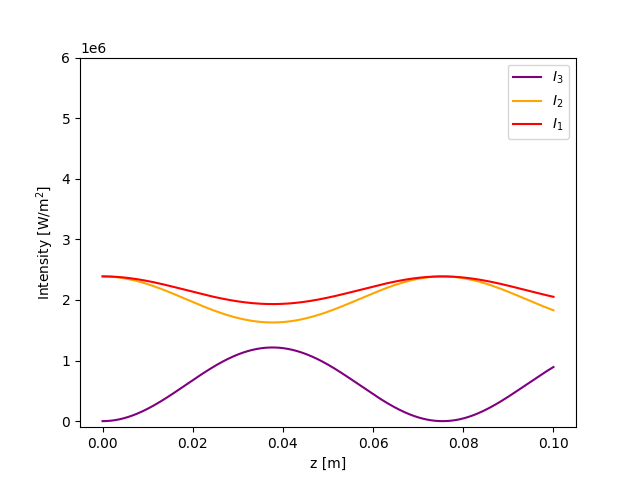

In [15]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
from scipy.constants import *
%matplotlib widget


# define coupled wave equation model.  Later this will be called by a ode solver.
def model(z, E, Lcoh):  
    E3, E2, E1 = E  
    dk = np.pi/Lcoh     ## lcoh是相干长度
    dE3dz = a3*E1*E2*np.exp(-1j*dk*z)
    dE2dz = a2*E3*np.conjugate(E1)*np.exp(1j*dk*z)
    dE1dz = a1*E3*np.conjugate(E2)*np.exp(1j*dk*z)
    dEdz = [dE3dz, dE2dz, dE1dz]
    return dEdz


# Wrap the ode solver in an update function for animating the plot
def update(Lcoh = 5e-2, E10 = 3e4, E20 = 3e4, E30 = 0):
    E0 = [E30 + 0j, E20+0j, E10+0j] # set initial field values
    sol = solve_ivp(model,[z0,zf], E0, t_eval = z, args = (Lcoh,)) #ode solver 
    I3 = c*epsilon_0*n3*np.abs(sol.y[0])**2 #get intensities
    I2 = c*epsilon_0*n2*np.abs(sol.y[1])**2
    I1 = c*epsilon_0*n1*np.abs(sol.y[2])**2
    line0.set_ydata(I3) #update graph
    line1.set_ydata(I2)
    line2.set_ydata(I1)


    
# Create z array
z0 = 0
zf = 0.1 #10 cm long crystal
Nz = 1001
z = np.linspace(z0, zf, Nz)

# 
chi2 = 60e-12 # Highest lithium niobate value (from Boyd)

omega1 = 2*np.pi*300e12 #approx 1000 nm (infrared)
omega2 = 2*np.pi*500e12 #approx 600 nm (orange)
omega3 = omega1+omega2 #approx 375 nm (violet)

n1 = 1 # need to put in refractive index for lithium niobate
n2 = 1
n3 = 1

a3 = 1j*chi2*omega3/(c*n3)
a2 = 1j*chi2*omega2/(c*n2)
a1 = 1j*chi2*omega1/(c*n1)


fig, ax = plt.subplots()
dummy_I = np.zeros_like(z)
line0, = ax.plot(z, dummy_I, label = '$I_3$', color = 'purple')
line1, = ax.plot(z, dummy_I, label = '$I_2$', color = 'orange')
line2, = ax.plot(z, dummy_I, label = '$I_1$', color = 'red')

ax.set_ylabel('Intensity [W/m$^2$]')
ax.set_xlabel('z [m]')
ax.legend()
ax.set_ylim(-1e5, 6e6)

## Lcoh是相干长度
ipw.interact(update, Lcoh = (1e-4, 0.1, 0.001), E10 = (1,5e4,1e3), E20 = (1,5e4,1e3), E30 = (0,5e4,1e3) )
plt.show()


## Exercises

1. (40 pts Extra Credit) Table 1.5.3 on page 49 of Boyd gives values of nonlinear susceptibilities for several crystals.  
Note that $d = \frac{1}{2}\chi^{(2)}$ by convention.  
Re-solve the differential equations using quartz instead of lithium niobate and plot the result.  Find initial values of the electric field for each wave that correspond to sum-frequency generation and difference frequency generation. How much larger does the field need to be in quartz than in lithium niobate to achieve the same response?
2. (20 pts) Suppose you need to order a lithium niobate crystal to perform sum frequency generation. You have two mode-locked lasers: one at $\omega_1 = 2\pi \times 300$ THz that can produces a electric field of 30,000 V/m, and another at $\omega_2 = 2\pi\times$ 500 THz can produce a electric of 10,000 V/m.  What is the minimum coherence length needed to produce light at 800 THz equal in intesity to the light at 500 Thz?  At this coherence length, how long should you ask the manufacturer to cut the crystal?

## Quasi Phase Matching

When a nonlinear process is phase matched, it means that the polarization wave that in the nonlinear medium has the same wavelength as the optical wave you wish to produce.  
When this (phase matching) happens, the electric field from the generated wave will always push atoms farther from equilibrium, increasing the amplitude of their motion.  
This is analogous to a child on a swing.  If the parent pushes the child out of phase even a little bit, the eventually the pushes will be working to decrease the swing's amplitude rather than increase it.

We can visualize this by plotting the polarization wave and the produced electric field in the medium:

interactive(children=(FloatSlider(value=0.1, description='Lcoh', max=0.2, min=0.0002, step=0.0002), Output()),…

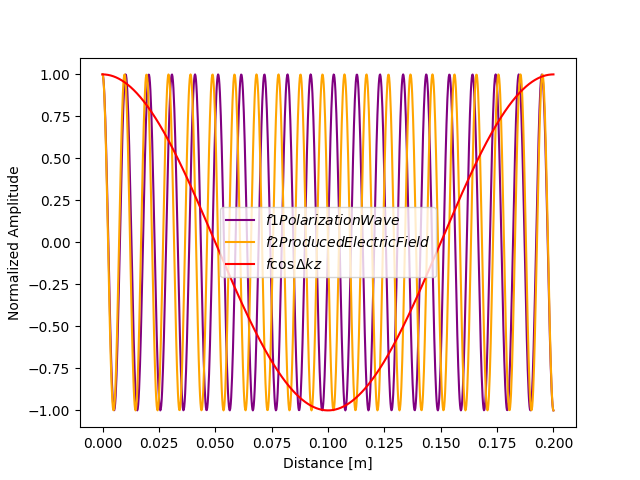

In [36]:
k0 = 2*np.pi/0.01 # mean wave vector of polarization and electric field

def update(Lcoh = 0.1):
    dk = np.pi/Lcoh # wave vector mismatch
    f1 = np.cos((k0-dk/2)*z) #polarization wave
    f2 = np.cos((k0+dk/2)*z) #electric field wave
    f = np.cos(dk*z) # resulting beat wave
    line0.set_ydata(f1) #update graph
    line1.set_ydata(f2)
    line2.set_ydata(f)
min = 0
max = 0.2
num = 1000
z = np.linspace(min, max, 1000)

fig, ax = plt.subplots()
dummy = np.zeros_like(z)
line0, = ax.plot(z, dummy, label = r'$f1  Polarization Wave$', color = 'purple')
line1, = ax.plot(z, dummy, label = r'$f2  Produced Electric Field$', color = 'orange')
line2, = ax.plot(z, dummy, label = r'$f  \cos \Delta k z$', color = 'red')

ax.set_ylabel('Normalized Amplitude')
ax.set_xlabel('Distance [m]')
ax.set_ylim(-1.1,1.1)
ax.legend()

ipw.interact(update, Lcoh = ((max-min)/num, max, (max-min)/num))
plt.show()

From this plot, we can visualize the polarization wave and produced electric field slipping 180 degrees out of phase after one coherence length.

In some situations it is not possible to achive phase matching ($\Delta k = 0)$ for a particular nonlinear process or material,  but there is a clever trick called quasi phase matching that can help.  There are experimental techniques to reverse the sign of the nonlinearity in non-centrosymmetric materials at regular intervals.  This corresponds to inverting the potential well of the nucleus-electron mass spring system, so that the restoring force is suddenly flipped.  If the material is flipped this way once every coherence length, then the polarization wave and electric field repeatedly slip out of phase for a coherence length, and then slip back into phase for a coherence length. The experiemental technique to accomplish this is called periodic poling.

Mathematicaly, we can model this by assuming that the phase $\Delta k z$ flips every time $z$ increases by a coherence length.  Using Scipy signal package, we can define a square-wave function $p(z)$ that goes between 1 and -1 every coherence length:

In [ ]:
from scipy import signal
p = signal.square(5*dk * z)

fig = plt.subplots()
plt.plot(z, p, 'k')
plt.plot(z, 5*p*dk*z % (2*np.pi))
plt.plot(z, 5*dk*z % (2*np.pi), 'k--')
plt.show()

In [ ]:
fig = plt.subplots()
plt.plot(z, p, 'k')
plt.plot(z, np.sin(5*dk*z*p))
plt.plot(z, np.sin(5*dk*z), 'k--')
plt.show()

In [ ]:
## Include quasi phase matching

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
from scipy.constants import *
%matplotlib widget

# define coupled wave equation model.  Later this will be called by a ode solver.
def model(z, E, Lcoh):  
    E3, E2, E1 = E  
    dk = np.pi/Lcoh
    
    p = signal.square(dk * z)#periodically poling function
    
    dE3dz = a3*E1*E2*np.exp(-1j*dk*z*p)
    dE2dz = a2*E3*np.conjugate(E1)*np.exp(1j*dk*z*p)
    dE1dz = a1*E3*np.conjugate(E2)*np.exp(1j*dk*z*p)
    dEdz = [dE3dz, dE2dz, dE1dz]
    return dEdz


# Wrap the ode solver in an update function for animating the plot
def update(Lcoh = 1e-2, E10 = 1.5e4, E20 = 1.5e4, E30 = 0):
    E0 = [E30 + 0j, E20+0j, E10+0j] # set initial field values
    sol = solve_ivp(model,[z0,zf], E0, t_eval = z, args = (Lcoh,)) #ode solver 
    I3 = c*epsilon_0*n3*np.abs(sol.y[0])**2 #get intensities
    I2 = c*epsilon_0*n2*np.abs(sol.y[1])**2
    I1 = c*epsilon_0*n1*np.abs(sol.y[2])**2
    line0.set_ydata(I3) #update graph
    line1.set_ydata(I2)
    line2.set_ydata(I1)


    
# Create z array
z0 = 0
zf = 0.1 #10 cm long crystal
Nz = 1001
z = np.linspace(z0, zf, Nz)

# 
chi2 = 60e-12 # Highest lithium niobate value (from Boyd)

omega1 = 2*np.pi*300e12 #approx 1000 nm (infrared)
omega2 = 2*np.pi*500e12 #approx 600 nm (orange)
omega3 = omega1+omega2 #approx 375 nm (violet)

n1 = 1 # need to put in refractive index for lithium niobate
n2 = 1
n3 = 1

a3 = 1j*chi2*omega3/(c*n3)
a2 = 1j*chi2*omega2/(c*n2)
a1 = 1j*chi2*omega1/(c*n1)


fig, ax = plt.subplots()
dummy_I = np.zeros_like(z)
line0, = ax.plot(z, dummy_I, label = '$I_3$', color = 'purple')
line1, = ax.plot(z, dummy_I, label = '$I_2$', color = 'orange')
line2, = ax.plot(z, dummy_I, label = '$I_1$', color = 'red')

ax.set_ylabel('Intensity [W/m$^2$]')
ax.set_xlabel('z [m]')
ax.legend()
ax.set_ylim(-1e5, 5e6)


ipw.interact(update, Lcoh = (1e-4, 0.1, 0.001), E10 = (1,5e4,1e3), E20 = (1,5e4,1e3), E30 = (0,5e4,1e3) )
plt.show()

## Exercises

1. (60 pts) Design a simulation in which you allow the period of the poling to not exactly match the coherence length.  In other words, $L_{pole} = 2 \eta L_{coh}$, where $\eta$ is a number close to 1.  For what values of $\eta$ do you notice an appreciable loss in conversion efficiency?  Does this depend on the input powers of the lasers, and the length of the crystal relative to the coherence length?